In [1]:
import pickle
import numpy as np
import pandas as pd
import datetime
import os
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [14]:
os.chdir(r'C:\Users\Enrique\Desktop\Proyecto\Datasets')

df = pd.DataFrame(pickle.load(open('Dataframe pickle.pkl','rb')))

df.index = df["Unnamed: 0.1"].map(lambda x : datetime.datetime.strptime(x,"%Y-%m-%d"))
df.index.name="Date"
df.drop("Unnamed: 0", axis =1, inplace = True)
df.drop("Unnamed: 0.1", axis =1, inplace = True)

In [3]:
df1 = df.copy()

selec_columns = [i for i in df.columns][:330]
df1 = df1['2014':]
df1 = df1.drop(selec_columns, axis = 1)
df = df['2014':]#descartamos el periodo 2012-2014

In [4]:
scaler = MinMaxScaler(feature_range = (0, 1))
dfescalado = scaler.fit_transform(df1) #escalamos los datos

In [5]:
pca = PCA()
pca = pca.fit(dfescalado) #reducimos la dimensionalidad sin fijar componenetes para ver la varianza ploteada

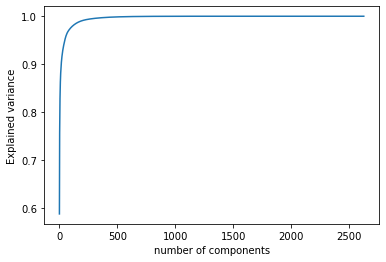

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

In [7]:
pca = PCA(n_components = 20) #elegimos 20 componentes
pca = pca.fit(dfescalado)

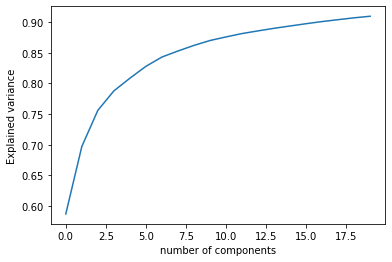

In [8]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show() #nos quedamos con el 90% de la varianza explicada de nuestras variables

In [9]:
pca.explained_variance_ratio_

array([0.58714433, 0.10986764, 0.05899566, 0.03172677, 0.02065656,
       0.01938034, 0.0151983 , 0.00981835, 0.00914702, 0.00796703,
       0.00586134, 0.00548398, 0.00438369, 0.00418762, 0.00378125,
       0.00372522, 0.00349441, 0.00309289, 0.00302537, 0.00255657])

In [10]:
dfpca = pca.transform(dfescalado) #transformamos los datos

# K-MEANS

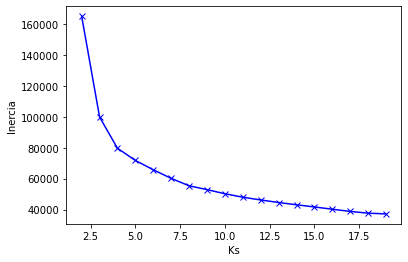

In [11]:
from sklearn.cluster import KMeans

inercias = [] 
  
for k in range(2,20): 
    kmeans = KMeans(k)
    kmeans.fit(dfpca)     
    inercias.append(kmeans.inertia_) 
inercias

plt.plot(range(2,20), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()
#diagrama de codo para elegir el número devecinos 

In [12]:
from sklearn.metrics import silhouette_score
# silhouette va des de -1 a 1
silhouette_coefficients = []

#Tiene en cuenta 2 factores
# - Como de cerca estan los puntos de un grupo
# - Como de lejos estan de los otros grupos

# Empezamos con 2
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfpca)
    score = silhouette_score(dfpca, kmeans.labels_)
    silhouette_coefficients.append(score)

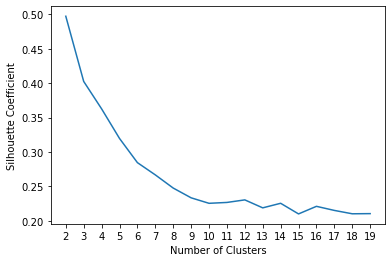

In [13]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#métrica shiloutte score para cada número de vecinos para elegir el 'optimo' la cohesion y separaión de los puntos d cada cluster

In [14]:
from sklearn.metrics import davies_bouldin_score

db_coefficients = []


for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfpca)
    score = davies_bouldin_score(dfpca, kmeans.labels_)
    db_coefficients.append(score)

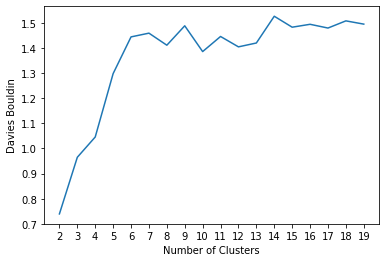

In [15]:
plt.plot(range(2, 20), db_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin")
plt.show()

#métrica davies bouldin score para cada número de vecinos para elegir el 'optimo' segun lo compactos que sean y como seten de separados los clsuters

# HERARCHICAL 

In [16]:
from scipy.spatial import distance_matrix 
dist_matrix = distance_matrix(dfpca,dfpca) 
print(dist_matrix, dist_matrix.shape)

[[ 0.          1.13947389  1.92677809 ... 23.05092751 23.04211395
  23.02358556]
 [ 1.13947389  0.          1.02917983 ... 23.08547055 23.06353152
  23.04572296]
 [ 1.92677809  1.02917983  0.         ... 23.05541069 23.00476366
  22.95892733]
 ...
 [23.05092751 23.08547055 23.05541069 ...  0.          1.01029462
   2.05592824]
 [23.04211395 23.06353152 23.00476366 ...  1.01029462  0.
   1.14404995]
 [23.02358556 23.04572296 22.95892733 ...  2.05592824  1.14404995
   0.        ]] (3094, 3094)


In [17]:
from scipy.cluster import hierarchy 
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter
simplefilter("ignore", ClusterWarning)
Z = hierarchy.linkage(dist_matrix, 'complete') #creas el endograma

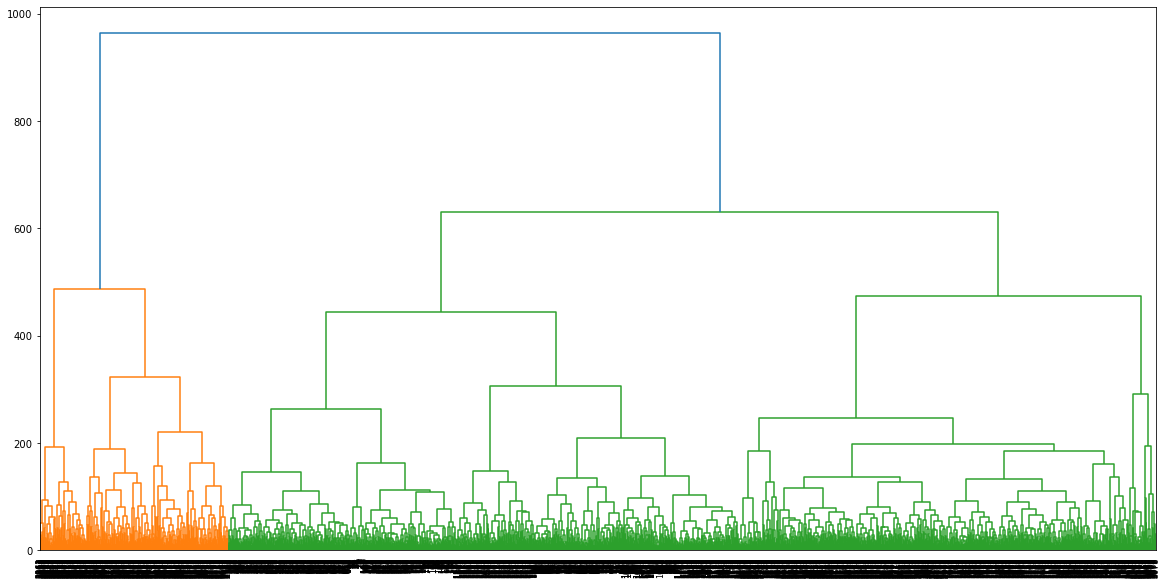

In [18]:
plt.figure(figsize=(20,10))
dendro = hierarchy.dendrogram(Z)
plt.tick_params(axis='x', labelsize=8)

#dendograma para visualizar la separación óptima

In [19]:
from sklearn.cluster import AgglomerativeClustering  

silhouette_coefficients = []

for k in range(2, 20):
    agglom = AgglomerativeClustering(n_clusters = k, linkage = 'complete')
    agglom.fit(dfpca)
    score = silhouette_score(dfpca, agglom.labels_)
    silhouette_coefficients.append(score)

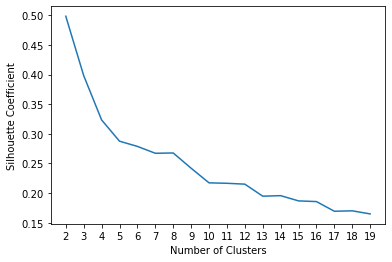

In [20]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [21]:
db_coefficients = []

for k in range(2, 20):
    agglom = AgglomerativeClustering(n_clusters = k, linkage = 'complete')
    agglom.fit(dfpca)
    score = davies_bouldin_score(dfpca, agglom.labels_)
    db_coefficients.append(score)

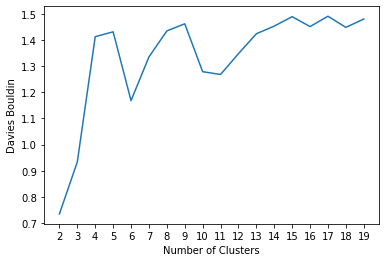

In [22]:
plt.plot(range(2, 20), db_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin")
plt.show()

# DBSCAN

In [23]:
from sklearn.cluster import DBSCAN

silhouette_coefficients = []

for i in np.arange(0.7, 1, 0.1): 
    dbscan = DBSCAN(eps = i)
    dbscan.fit(dfpca)
    score = silhouette_score(dfpca, dbscan.labels_)
    silhouette_coefficients.append(score)

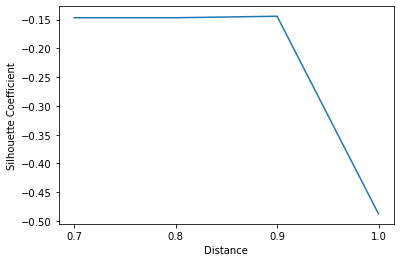

In [24]:
plt.plot(np.arange(0.7, 1, 0.1), silhouette_coefficients)
plt.xticks(np.arange(0.7, 1, 0.1))
plt.xlabel("Distance")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [25]:
silhouette_coefficients = []

for i in range(2,6): #si incluimos 6 solo hace un cluster
    dbscan = DBSCAN(eps = 0.7, min_samples =i)
    dbscan.fit(dfpca)
    score = silhouette_score(dfpca, dbscan.labels_)
    silhouette_coefficients.append(score)

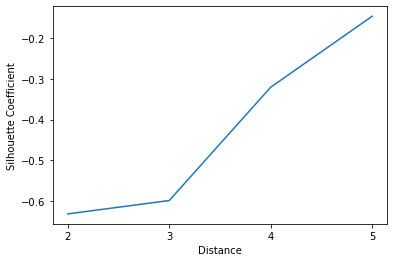

In [26]:
plt.plot(range(2,6), silhouette_coefficients)
plt.xticks(range(2,6))
plt.xlabel("Distance")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Análisis

In [54]:
kmeans = KMeans(2)
kmeans.fit(dfpca)     
#me quedo con kmenas, es el que tiene mejores métrias

KMeans(n_clusters=2)

In [55]:
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
df2 = df.copy()
df2 = df2['2014':]

In [57]:
df2["CLusters"] = kmeans.labels_ #añadimos los labels al dataframe
df2["CLusters"].value_counts(normalize = True)

In [90]:
df2.groupby("CLusters")["Change percentage"].max()

CLusters
0    26.772000
1    19.564318
Name: Change percentage, dtype: float64

<AxesSubplot:xlabel='Unnamed: 0.1', ylabel='Close'>

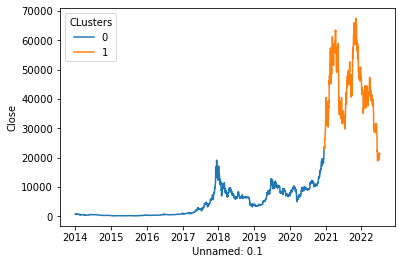

In [61]:
import seaborn as sns

sns.lineplot(x=df2.index, y="Close",
             hue="CLusters",
             data=df2)

#plot para ver los puntos de los clases en cuento al precio
#vemos que los agrupa segun en dos periodos

In [62]:
df2.head(1)

,Open,High,Low,Close,Aroon Oscillator,Average True Range,Average Price 9,Bband upper_band,Bbands middle_band,Bbands lower_band,...,addr.act.rcv.cnt_8,exch.bitmex.flow.in.ntv_8,exch.bitmex.flow.out.ntv_8,exch.sply.bittrex.ntv_8,exch.sply.gemini_8,exch.bitstamp.flow.net.ntv_8,exch.bittrex.flow.out.ntv_8,Change percentage_8,Weekday,CLusters
Unnamed: 0.1,,,,,,,,,,,,,,,,,,,,,
2014-01-01,746.2226,775.0,740.18292,775.0,100.0,78.52641,759.10138,902.13498,716.82007,531.50515,...,131055.0,0.0,0.0,0.0,0.0,-6557.438028,0.0,1.08757,3,0


In [158]:
df3 = df.copy()
df3 = df3["2014":]

ocm = []

for i in df.columns:
    if i[0].isupper():
        ocm.append(i)
        
df3 = df3.drop(ocm, axis = 1)

#elimino los inidicadores técnicos y las variables que tienen que ver con el precio para vovler hacer un clsutering

In [159]:
df3.columns

Index(['addr.bal.10.ntv.cnt', 'exch.gemini.flow.in', 'exch.binance.flow.out',
       'exch.bitstamp.flow.out', 'sply.total.iss.ntv', 'mcap.dom',
       'nvt.adj.90d.ma', 'addr.bal.10k.ntv.cnt', 'exch.binance.flow.net',
       'mcap.out',
       ...
       'exch.kraken.flow.net.ntv_8', 'exch.sply.bitstamp.ntv_8', 'hash.rev_8',
       'addr.act.rcv.cnt_8', 'exch.bitmex.flow.in.ntv_8',
       'exch.bitmex.flow.out.ntv_8', 'exch.sply.bittrex.ntv_8',
       'exch.sply.gemini_8', 'exch.bitstamp.flow.net.ntv_8',
       'exch.bittrex.flow.out.ntv_8'],
      dtype='object', length=1863)

In [160]:
scaler = MinMaxScaler(feature_range = (0, 1))
dfescalado = scaler.fit_transform(df3)

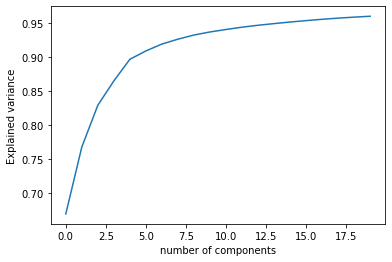

In [161]:
pca = PCA(n_components = 20)
pca = pca.fit(dfescalado)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Explained variance')
plt.show()

In [162]:
dfpca = pca.transform(dfescalado)

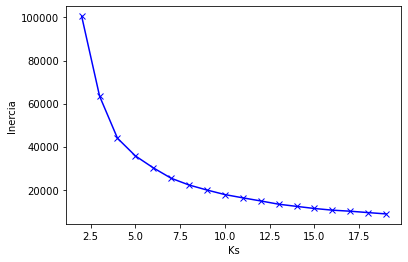

In [163]:
inercias = [] 
  
for k in range(2,20): 
    kmeans = KMeans(k)
    kmeans.fit(dfpca)     
    inercias.append(kmeans.inertia_) 
inercias

plt.plot(range(2,20), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()


In [164]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfpca)
    score = silhouette_score(dfpca, kmeans.labels_)
    silhouette_coefficients.append(score)

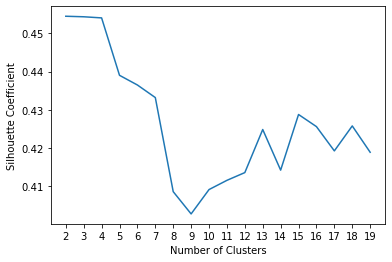

In [165]:
plt.plot(range(2, 20), silhouette_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()


In [166]:
from sklearn.metrics import davies_bouldin_score
# silhouette va des de -1 a 1
db_coefficients = []


for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dfpca)
    score = davies_bouldin_score(dfpca, kmeans.labels_)
    db_coefficients.append(score)

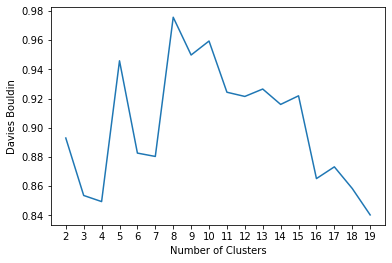

In [167]:
plt.plot(range(2, 20), db_coefficients)
plt.xticks(range(2, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("Davies Bouldin")
plt.show()

In [168]:
kmeans = KMeans(3)
kmeans.fit(dfpca)     

KMeans(n_clusters=3)

In [169]:
df4= df.copy()
df4 = df4['2014':]

In [170]:
df4["CLusters"] = kmeans.labels_
df4["CLusters"].value_counts(normalize = True)

2    0.428895
0    0.388171
1    0.182935
Name: CLusters, dtype: float64

<AxesSubplot:xlabel='Unnamed: 0.1', ylabel='Close'>

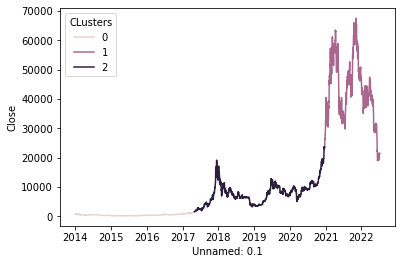

In [171]:
import seaborn as sns

sns.lineplot(x=df4.index, y="Close",
             hue="CLusters",
             data=df4)
#sigue diviendo en franjas por periodos